<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/32_Outlier_Detection_in_Substance_Use_Patterns_Using_Isolation_Forest_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Outlier Detection in Substance Use Patterns Using Isolation Forest Algorithm</b></div>




## Project Overview

In this project, I apply the **Isolation Forest** algorithm to detect anomalies in a dataset of 1885 respondents. The dataset contains features, including personality traits based on the **NEO-FFI-R dimensions** (neuroticism, extraversion, openness, agreeableness, and conscientiousness), impulsivity, sensation seeking, as well as demographic data such as age, gender, education, country of residence, and ethnicity.

The goal is to identify outliers that display unusual patterns in drug consumption, based on the respondents' personality traits and demographics. By utilizing Isolation Forest, an unsupervised learning algorithm, I aim to efficiently spot these anomalies in high-dimensional data.


# *1.Import Library*

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# *2.Import Dataset*

In [ ]:
df=pd.read_csv('Downloads/archive-3/Drug_Consumption.csv')
df.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# *3.Data Analysis and Visualization*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

In [ ]:
df.describe()

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,544.877779,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,2.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.750000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.500000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.250000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


array([[<Axes: title={'center': 'Nscore'}>,
        <Axes: title={'center': 'Escore'}>,
        <Axes: title={'center': 'Oscore'}>],
       [<Axes: title={'center': 'AScore'}>,
        <Axes: title={'center': 'Cscore'}>,
        <Axes: title={'center': 'Impulsive'}>],
       [<Axes: title={'center': 'SS'}>, <Axes: >, <Axes: >]], dtype=object)

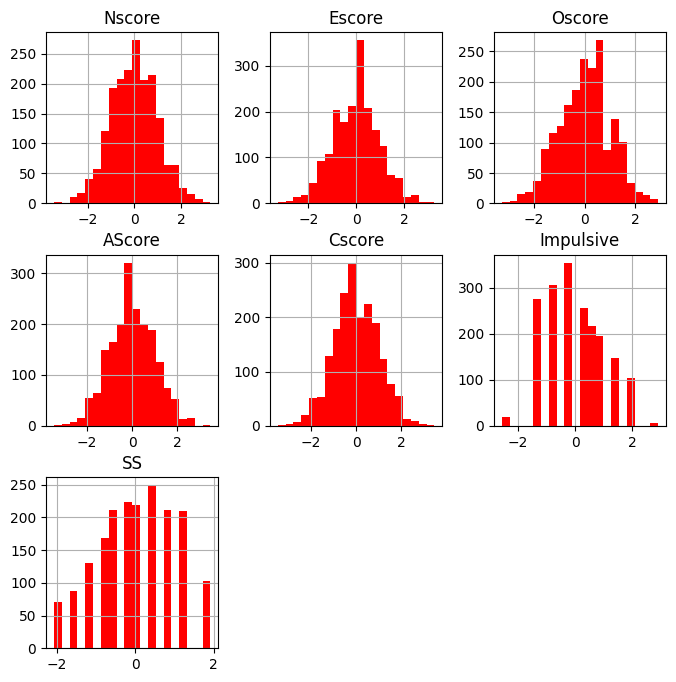

In [ ]:
df.drop('ID', axis=1).hist(bins=20,figsize=(8,8),color='r')

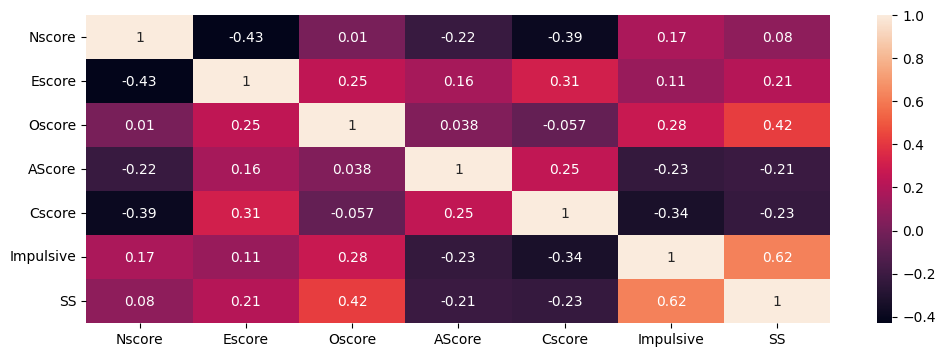

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']].corr(), annot=True, ax=ax)
plt.show()


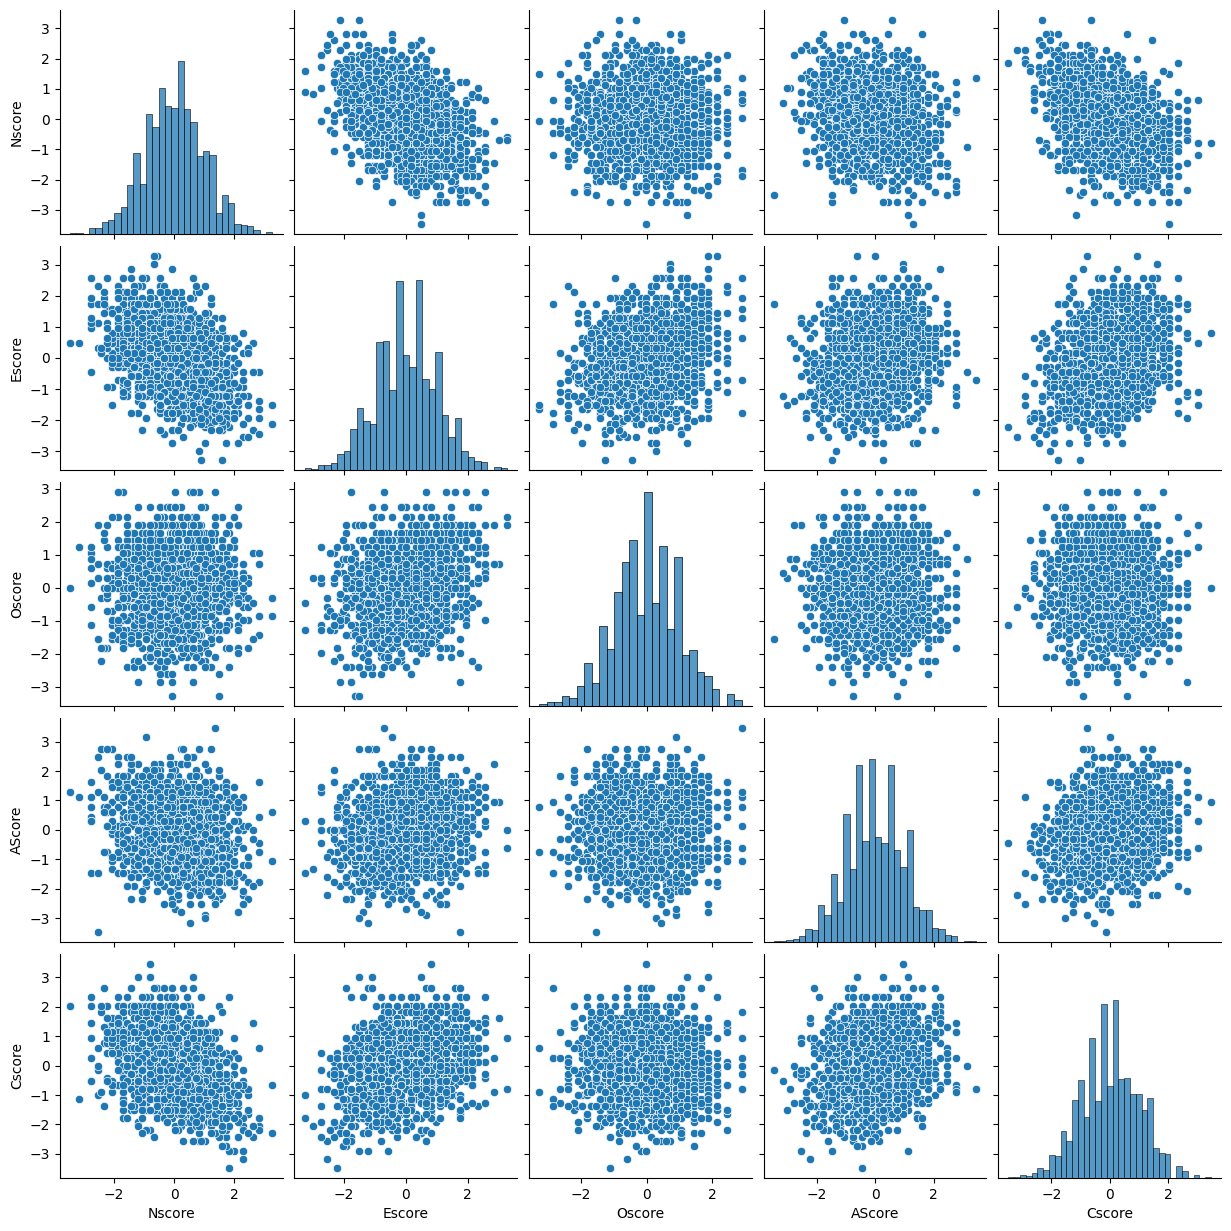

In [ ]:
df1=df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']]
sns.pairplot(df1)

# *4.Data Cleaning*

In [ ]:
df_final=df[['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']]
df_final.head()
# we need only continues values to detect outliers

,Nscore,Escore,Oscore,AScore,Cscore
0,-0.67825,1.93886,1.43533,0.76096,-0.14277
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088


# *5.Model Selecting and Training*

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.02) # I want to set 2% of dataset as outlier
model.fit(df_final)

IsolationForest(contamination=0.02)

In [ ]:
model.predict(df_final)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Visualize the anomalies on the seaborn pair plot
import warnings
warnings.filterwarnings('ignore')
df_final['anomaly'] = model.predict(df_final)
df_final.head()

,Nscore,Escore,Oscore,AScore,Cscore,anomaly
0,-0.67825,1.93886,1.43533,0.76096,-0.14277,1
1,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,1
2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,1
3,0.73545,-1.63340,-0.45174,-0.30172,1.30612,1
4,-0.67825,-0.30033,-1.55521,2.03972,1.63088,1


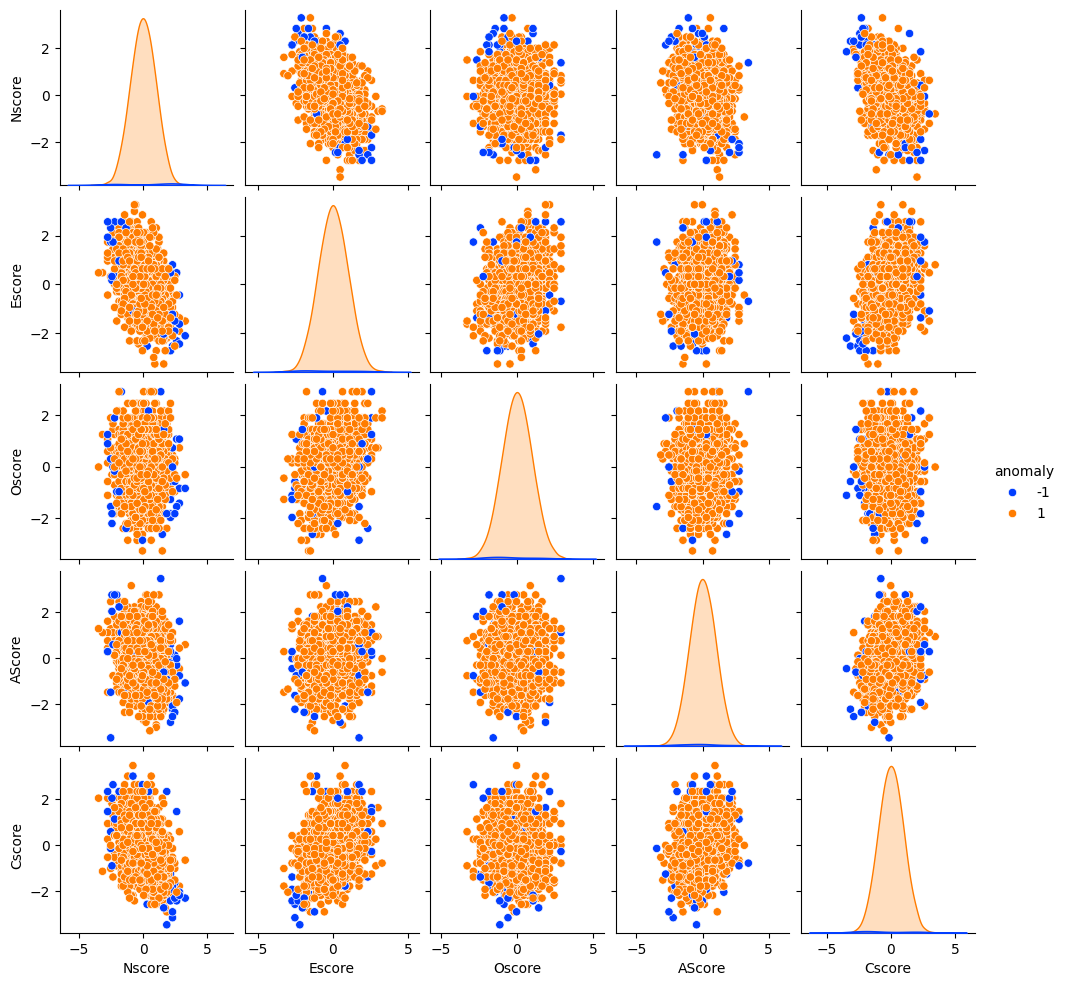

In [ ]:
# show anomalies in pairplot
sns.pairplot(df_final, hue='anomaly', palette='bright', height=2);

In [ ]:
df_final.sort_values('anomaly',ascending=True)

,Nscore,Escore,Oscore,AScore,Cscore,anomaly
1128,2.28554,0.80523,0.72330,-2.07848,-1.78169,-1
897,-2.52197,1.74091,-1.55521,-3.46436,-0.14277,-1
435,2.82196,-0.43999,-0.84732,-1.77200,-2.04506,-1
1448,0.41667,-0.43999,2.15324,-1.92595,2.33337,-1
1587,-2.05048,0.80523,-0.97631,2.75696,1.13407,-1
...,...,...,...,...,...,...
623,-0.34799,-0.57545,-0.58331,-0.91699,0.25953,1
622,0.04257,0.00332,-1.27553,-0.01729,0.25953,1
621,-0.34799,0.00332,-0.45174,-0.30172,-1.38502,1
633,-0.79151,-0.30033,-0.17779,1.11406,-0.52745,1


In [ ]:
df_final['anomaly'].value_counts()

anomaly
 1    1846
-1      38
Name: count, dtype: int64

In [ ]:
# 38 Outliers were found